In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from datetime import date,datetime,time,timezone

df=pd.read_csv("C:/Users/Windows 10/Downloads/capture-fisheries-vs-aquaculture (1).csv")
df.head()

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,60.0,400.0
1,Afghanistan,AFG,1970,60.0,400.0
2,Afghanistan,AFG,1971,60.0,500.0
3,Afghanistan,AFG,1972,60.0,500.0
4,Afghanistan,AFG,1973,60.0,500.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12727 entries, 0 to 12726
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      12727 non-null  object 
 1   Code                                        11901 non-null  object 
 2   Year                                        12727 non-null  int64  
 3   Aquaculture production (metric tons)        9710 non-null   float64
 4   Capture fisheries production (metric tons)  12569 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 497.3+ KB


In [3]:
df.drop(['Code'],axis=1,inplace=True)
df.head()

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
0,Afghanistan,1969,60.0,400.0
1,Afghanistan,1970,60.0,400.0
2,Afghanistan,1971,60.0,500.0
3,Afghanistan,1972,60.0,500.0
4,Afghanistan,1973,60.0,500.0


In [4]:
df.isnull().sum()

Entity                                           0
Year                                             0
Aquaculture production (metric tons)          3017
Capture fisheries production (metric tons)     158
dtype: int64

In [5]:
change_value=0
df.fillna(change_value,inplace=True)
df.isnull().sum()

Entity                                        0
Year                                          0
Aquaculture production (metric tons)          0
Capture fisheries production (metric tons)    0
dtype: int64

In [6]:
df['new_Year']=pd.to_datetime(df['Year'].astype(str),format='%Y')
df.set_index('new_Year',inplace=True)
df.drop(['Year'],axis=1,inplace=True)
df.head()

,Entity,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,,
1969-01-01,Afghanistan,60.0,400.0
1970-01-01,Afghanistan,60.0,400.0
1971-01-01,Afghanistan,60.0,500.0
1972-01-01,Afghanistan,60.0,500.0
1973-01-01,Afghanistan,60.0,500.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12727 entries, 1969-01-01 to 1969-01-01
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      12727 non-null  object 
 1   Aquaculture production (metric tons)        12727 non-null  float64
 2   Capture fisheries production (metric tons)  12727 non-null  float64
dtypes: float64(2), object(1)
memory usage: 397.7+ KB


In [8]:
new_df=df.sort_index()
new_df.head()

,Entity,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,,
1960-01-01,Cayman Islands,0.0,0.0
1960-01-01,Bahrain,0.0,1500.0
1960-01-01,North Korea,5236.0,299190.0
1960-01-01,Northern Mariana Islands,0.0,100.0
1960-01-01,Norway,1900.0,1609362.0


In [9]:
new_df['Entity']=new_df['Entity'].astype('category')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12727 entries, 1960-01-01 to 2018-01-01
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Entity                                      12727 non-null  category
 1   Aquaculture production (metric tons)        12727 non-null  float64 
 2   Capture fisheries production (metric tons)  12727 non-null  float64 
dtypes: category(1), float64(2)
memory usage: 333.1 KB


In [10]:
new_df['Entity'].value_counts()

Entity
Afghanistan                   59
Poland                        59
Mozambique                    59
Myanmar                       59
Namibia                       59
                              ..
Serbia                        13
Saint Martin (French part)    12
Curacao                        8
Sint Maarten (Dutch part)      8
South Sudan                    7
Name: count, Length: 231, dtype: int64

In [11]:
g=new_df.groupby(['new_Year'])

In [12]:
g.head()

,Entity,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,,
1960-01-01,Cayman Islands,0.0,0.0
1960-01-01,Bahrain,0.0,1500.0
1960-01-01,North Korea,5236.0,299190.0
1960-01-01,Northern Mariana Islands,0.0,100.0
1960-01-01,Norway,1900.0,1609362.0
...,...,...,...
2018-01-01,Indonesia,14772104.0,7270238.0
2018-01-01,Cape Verde,0.0,26586.0
2018-01-01,Cayman Islands,0.0,125.0


In [13]:
for key,group in g:
    print(f'+key:{key}')
    print(f'+number:{len(group)}')
    print(group.head())
    print('\n')

+key:(Timestamp('1960-01-01 00:00:00'),)
+number:199
                              Entity  Aquaculture production (metric tons)  \
new_Year                                                                     
1960-01-01            Cayman Islands                                   0.0   
1960-01-01                   Bahrain                                   0.0   
1960-01-01               North Korea                                5236.0   
1960-01-01  Northern Mariana Islands                                   0.0   
1960-01-01                    Norway                                1900.0   

            Capture fisheries production (metric tons)  
new_Year                                                
1960-01-01                                         0.0  
1960-01-01                                      1500.0  
1960-01-01                                    299190.0  
1960-01-01                                       100.0  
1960-01-01                                   1609362.0  



In [14]:
world_total=g.sum(numeric_only=True)
world_total.head()

,Aquaculture production (metric tons),Capture fisheries production (metric tons)
new_Year,,
1960-01-01,10977127.0,161077154.0
1961-01-01,10322252.0,180573888.0
1962-01-01,10628086.0,198022581.0
1963-01-01,11882700.0,201874864.1
1964-01-01,12981280.0,226019748.1


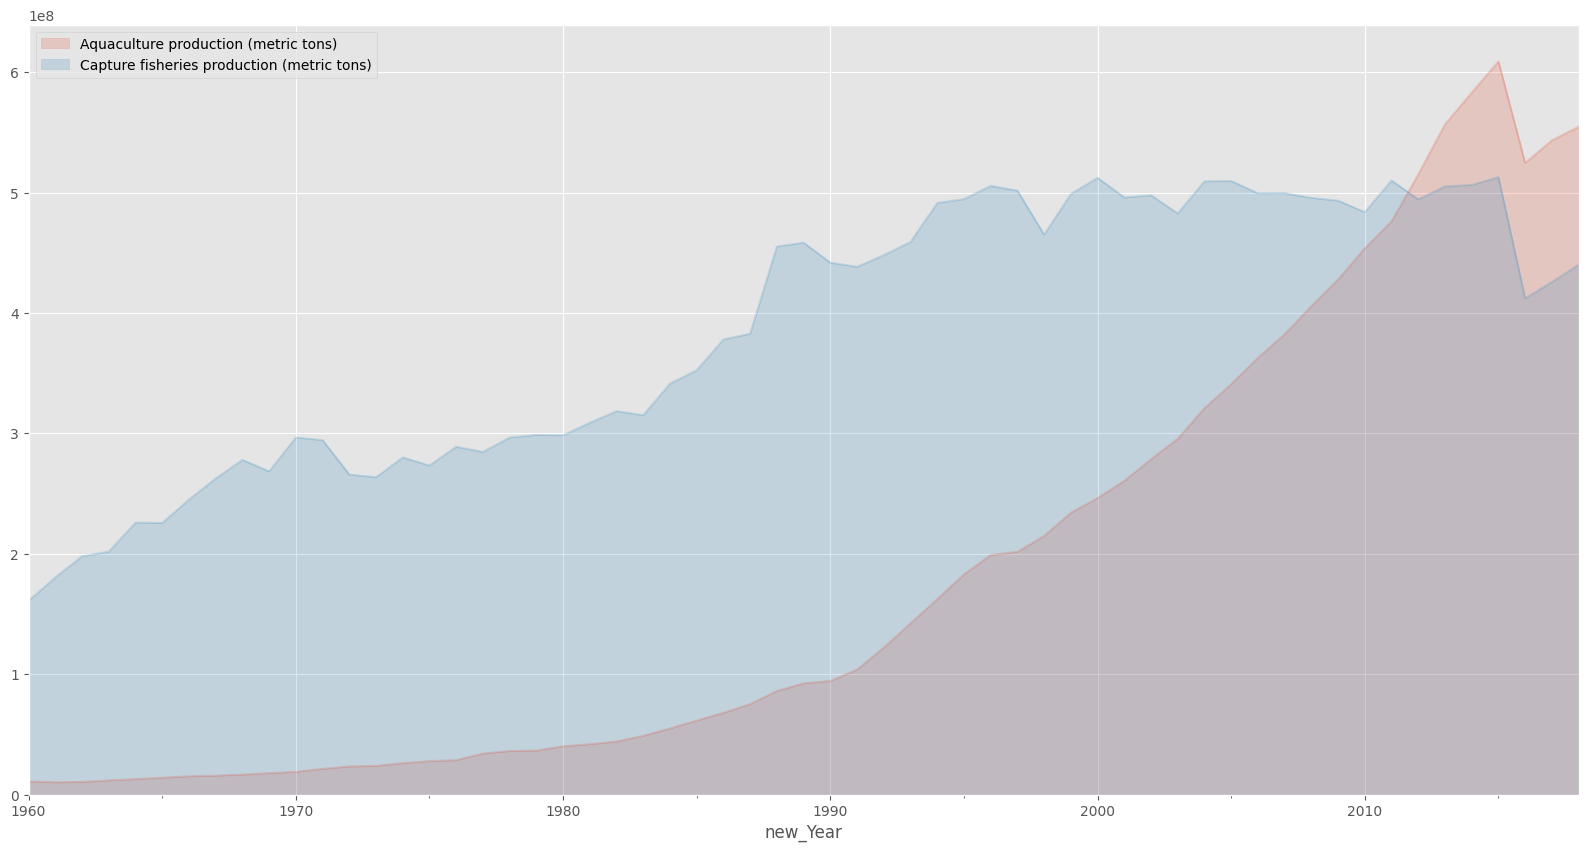

In [15]:
plt.style.use('ggplot')
world_total.plot(kind='area',
                 alpha=0.2,
                 stacked=False,
                 figsize=(20,10))
plt.legend()
plt.show()

In [16]:
country=new_df['Entity'].value_counts()
print(country)
print(f'Data type=>{type(country)}')

Entity
Afghanistan                   59
Poland                        59
Mozambique                    59
Myanmar                       59
Namibia                       59
                              ..
Serbia                        13
Saint Martin (French part)    12
Curacao                        8
Sint Maarten (Dutch part)      8
South Sudan                    7
Name: count, Length: 231, dtype: int64
Data type=><class 'pandas.core.series.Series'>


In [17]:
'South Korea'in country

True

In [18]:
s=new_df.loc[new_df['Entity']=='South Korea']
c=new_df.loc[new_df['Entity']=='China']
a=new_df.loc[new_df['Entity']=='Afghanistan']

In [19]:
# Select only numeric columns
s_numeric = s.select_dtypes(include=[float, int])
c_numeric = c.select_dtypes(include=[float, int])
a_numeric = a.select_dtypes(include=[float, int])

# Select specific columns from numeric DataFrames
s_y = s_numeric[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
s_x = s.index

c_y = c_numeric[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
c_x = c.index

a_y = a_numeric[['Aquaculture production (metric tons)', 'Capture fisheries production (metric tons)']]
a_x = a.index


Text(0.5, 0.98, 'Fish Production')

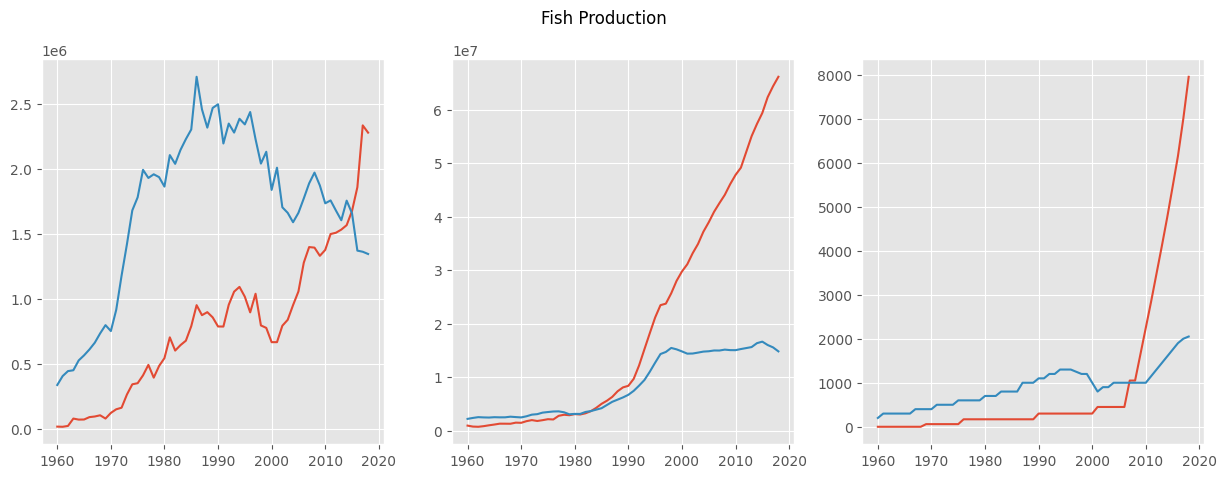

In [20]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,3, figsize=(15,5))
axs[0].plot(s_x,s_y)
axs[1].plot(c_x,c_y)
axs[2].plot(a_x,a_y)

fig.suptitle('Fish Production')